In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
# === Base path ===
base_path = "C:/Users/Administrator/PycharmProjects/Comprehensive/Cross_lang_ch8/DARCLnet/"
X_text_edaic = np.load(base_path + "Data_edaic/bert_embeddings_04sec_edaic.npy")
X_audio_edaic = np.load(base_path + "Data_edaic/acoustic_scaled_56_04sec_edaic.npy")
y_edaic = np.load(base_path + "Data_edaic/labels_04sec_edaic.npy")

# === Load MODMA data ===
X_text_modma = np.load(base_path + "Data_modma/bert_embeddings_04sec_modma.npy")
X_audio_modma = np.load(base_path + "Data_modma/acoustic_scaled_56_04sec_modma.npy")
y_modma = np.load(base_path + "Data_modma/labels_04sec_modma.npy")
# === Load CMD-C data ===
X_text_cmdc = np.load(base_path + "Data_cmdc/bert_embeddings_04sec_cmdc.npy")
X_audio_cmdc = np.load(base_path + "Data_cmdc/acoustic_scaled_56_04sec_cmdc.npy")
y_cmdc = np.load(base_path + "Data_cmdc/labels_04sec_cmdc.npy")

# === Load RAVDESS data ===
X_text_ravdess = np.load(base_path + "Data_ravdess/bert_embeddings_04sec_ravdess.npy")
X_audio_ravdess = np.load(base_path + "Data_ravdess/acoustic_scaled_56_04sec_ravdess.npy")
y_ravdess = np.load(base_path + "Data_ravdess/labels_04sec_ravdess.npy")
X_text_rav = X_text_ravdess  # convenient alias

# === Load EATD data ===
X_text_eatd = np.load(base_path + "Data_eatd/bert_embeddings_04sec_eatd.npy")
X_audio_eatd = np.load(base_path + "Data_eatd/acoustic_scaled_56_04sec_eatd.npy")
y_eatd = np.load(base_path + "Data_eatd/labels_04sec_eatd.npy")



Total samples after fusion: 444

=== Run 1/30 ===

=== Run 2/30 ===



=== Run 3/30 ===



=== Run 4/30 ===

=== Run 5/30 ===

=== Run 6/30 ===

=== Run 7/30 ===

=== Run 8/30 ===

=== Run 9/30 ===

=== Run 10/30 ===

=== Run 11/30 ===

=== Run 12/30 ===

=== Run 13/30 ===

=== Run 14/30 ===

=== Run 15/30 ===

=== Run 16/30 ===

=== Run 17/30 ===

=== Run 18/30 ===

=== Run 19/30 ===

=== Run 20/30 ===

=== Run 21/30 ===

=== Run 22/30 ===

=== Run 23/30 ===

=== Run 24/30 ===

=== Run 25/30 ===

=== Run 26/30 ===

=== Run 27/30 ===

=== Run 28/30 ===

=== Run 29/30 ===

=== Run 30/30 ===

 Averaged Classification Report (Domain-Blind Test Set)
Class          Precision    Recall  F1-Score
----------------------------------------------
HC                 93.75     93.65     93.60
MDD                85.03     84.10     84.02

Accuracy           90.89
Macro Avg          89.39     88.87     88.81
Weighted Avg       91.17     90.83     90.77


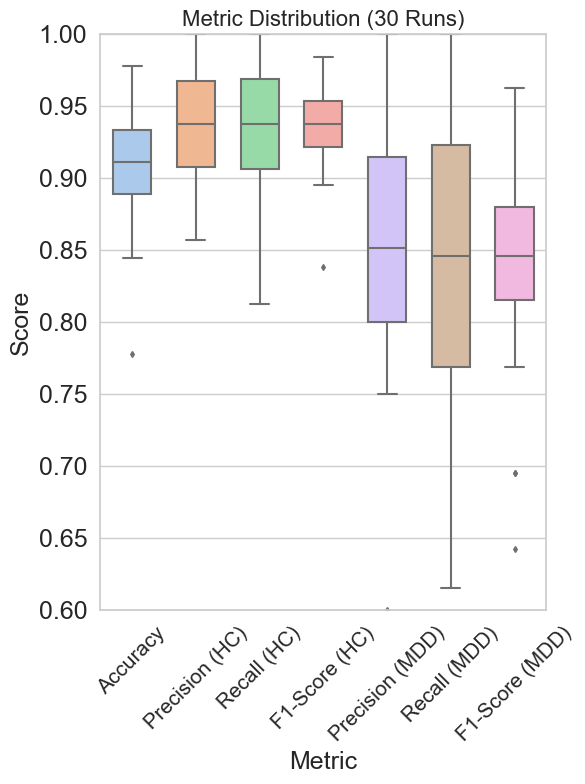

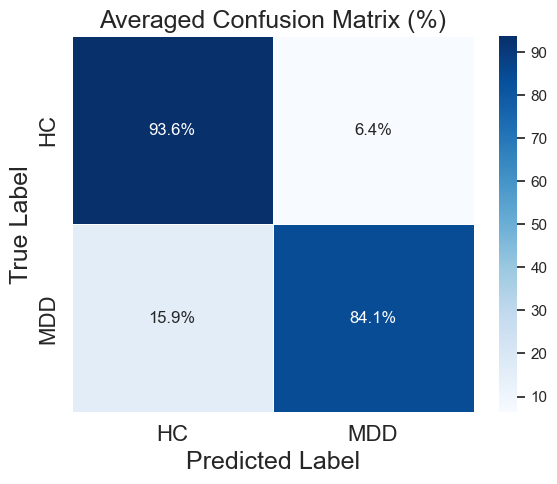

In [25]:
# Domain-blind model
# Domain-blind model: Train and test on combined EDAIC + MODMA dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# === Plot Style ===
sns.set(style="whitegrid")

# === Base Path ===
base_path = "C:/Users/Administrator/PycharmProjects/Comprehensive/Cross_lang_ch8/DARCLnet/"

# === Load Data ===
X_text_edaic = np.load(base_path + "Data_edaic/bert_embeddings_04sec_edaic.npy")
X_audio_edaic = np.load(base_path + "Data_edaic/acoustic_scaled_56_04sec_edaic.npy")
y_edaic = np.load(base_path + "Data_edaic/labels_04sec_edaic.npy")

X_text_modma = np.load(base_path + "Data_modma/bert_embeddings_04sec_modma.npy")
X_audio_modma = np.load(base_path + "Data_modma/acoustic_scaled_56_04sec_modma.npy")
y_modma = np.load(base_path + "Data_modma/labels_04sec_modma.npy")

# === Subsampling ===
X_fused_edaic = np.concatenate([X_text_edaic, X_audio_edaic], axis=1)[::81]
y_edaic = y_edaic[::81]

X_fused_modma = np.concatenate([X_text_modma, X_audio_modma], axis=1)[::10]
y_modma = y_modma[::10]

# === Combine ===
X_all = np.concatenate([X_fused_edaic, X_fused_modma], axis=0)
y_all = np.concatenate([y_edaic, y_modma], axis=0)

print(f"Total samples after fusion: {X_all.shape[0]}")

# === Results Storage ===
n_runs = 30
results = {
    "Accuracy": [],
    "Precision_HC": [],
    "Recall_HC": [],
    "F1_HC": [],
    "Precision_MDD": [],
    "Recall_MDD": [],
    "F1_MDD": []
}
conf_matrices = []

# === Training Loop ===
for run in range(n_runs):
    print(f"\n=== Run {run+1}/{n_runs} ===")
    X_train, X_test, y_train, y_test = train_test_split(
        X_all, y_all, test_size=0.1, stratify=y_all
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_split=0.1, batch_size=64, epochs=10, verbose=0)

    y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)

    results["Accuracy"].append(accuracy_score(y_test, y_pred))
    results["Precision_HC"].append(precision_score(y_test, y_pred, pos_label=0))
    results["Recall_HC"].append(recall_score(y_test, y_pred, pos_label=0))
    results["F1_HC"].append(f1_score(y_test, y_pred, pos_label=0))
    results["Precision_MDD"].append(precision_score(y_test, y_pred, pos_label=1))
    results["Recall_MDD"].append(recall_score(y_test, y_pred, pos_label=1))
    results["F1_MDD"].append(f1_score(y_test, y_pred, pos_label=1))
    conf_matrices.append(confusion_matrix(y_test, y_pred, labels=[0, 1]))

# === Print Average Results ===
def print_average_results(results, y_all):
    df = pd.DataFrame(results)
    acc = df["Accuracy"].mean()
    pre_hc = df["Precision_HC"].mean()
    rec_hc = df["Recall_HC"].mean()
    f1_hc = df["F1_HC"].mean()
    pre_mdd = df["Precision_MDD"].mean()
    rec_mdd = df["Recall_MDD"].mean()
    f1_mdd = df["F1_MDD"].mean()

    macro_pre = (pre_hc + pre_mdd) / 2
    macro_rec = (rec_hc + rec_mdd) / 2
    macro_f1 = (f1_hc + f1_mdd) / 2

    pos_ratio = y_all.mean()
    neg_ratio = 1 - pos_ratio
    weighted_pre = (pre_hc * neg_ratio) + (pre_mdd * pos_ratio)
    weighted_rec = (rec_hc * neg_ratio) + (rec_mdd * pos_ratio)
    weighted_f1 = (f1_hc * neg_ratio) + (f1_mdd * pos_ratio)

    print("\n Averaged Classification Report (Domain-Blind Test Set)")
    print(f"{'Class':<14}{'Precision':>10}{'Recall':>10}{'F1-Score':>10}")
    print("-" * 46)
    print(f"{'HC':<14}{pre_hc*100:10.2f}{rec_hc*100:10.2f}{f1_hc*100:10.2f}")
    print(f"{'MDD':<14}{pre_mdd*100:10.2f}{rec_mdd*100:10.2f}{f1_mdd*100:10.2f}")
    print(f"\n{'Accuracy':<14}{acc*100:10.2f}")
    print(f"{'Macro Avg':<14}{macro_pre*100:10.2f}{macro_rec*100:10.2f}{macro_f1*100:10.2f}")
    print(f"{'Weighted Avg':<14}{weighted_pre*100:10.2f}{weighted_rec*100:10.2f}{weighted_f1*100:10.2f}")

print_average_results(results, y_all)

# === Boxplot ===
metrics_order = [
    ("Accuracy", "Accuracy"),
    ("Precision_HC", "Precision (HC)"),
    ("Recall_HC", "Recall (HC)"),
    ("F1_HC", "F1-Score (HC)"),
    ("Precision_MDD", "Precision (MDD)"),
    ("Recall_MDD", "Recall (MDD)"),
    ("F1_MDD", "F1-Score (MDD)")
]

data = []
labels = []
for metric_key, metric_label in metrics_order:
    data.extend(results[metric_key])
    labels.extend([metric_label] * len(results[metric_key]))

df_plot = pd.DataFrame({"Metric": labels, "Value": data})

plt.figure(figsize=(6, 8))
sns.boxplot(x="Metric", y="Value", data=df_plot, palette="pastel", width=0.6, fliersize=3)
plt.title("Metric Distribution (30 Runs)", fontsize=16)
plt.ylabel("Score", fontsize=18)
plt.xlabel("Metric", fontsize=18)
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=18)
plt.ylim(0.6, 1.0)
plt.tight_layout()
plt.show()

# === Confusion Matrix (Averaged %) ===
cm_total = np.sum(conf_matrices, axis=0)
cm_normalized = cm_total.astype('float') / cm_total.sum(axis=1)[:, np.newaxis] * 100
labels_cm = np.array([["{0:.1f}%".format(value) for value in row] for row in cm_normalized])

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_normalized, annot=labels_cm, fmt="", cmap="Blues",
    linewidths=0.5, linecolor="white",
    xticklabels=["HC", "MDD"], yticklabels=["HC", "MDD"], cbar=True
)
plt.xlabel("Predicted Label", fontsize=18)
plt.ylabel("True Label", fontsize=18)
plt.title("Averaged Confusion Matrix (%)", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()

# === Optional Saving ===
pd.DataFrame(results).to_csv(base_path + "domain_blind_eval_results.csv", index=False)
np.save(base_path + "domain_blind_conf_matrices.npy", np.array(conf_matrices))




=== Classification Report for CMDC (Majority Vote) ===
              precision    recall  f1-score   support

          HC     0.6525    0.9851    0.7850      5967
         MDD     0.1682    0.0057    0.0111      3149

    accuracy                         0.6468      9116
   macro avg     0.4103    0.4954    0.3980      9116
weighted avg     0.4852    0.6468    0.5176      9116


=== Classification Report for RAVDESS (Majority Vote) ===
              precision    recall  f1-score   support

          HC     0.0000    0.0000    0.0000       192
         MDD     0.5000    1.0000    0.6667       192

    accuracy                         0.5000       384
   macro avg     0.2500    0.5000    0.3333       384
weighted avg     0.2500    0.5000    0.3333       384


=== Classification Report for EATD (Majority Vote) ===
              precision    recall  f1-score   support

          HC     0.8618    1.0000    0.9258       131
         MDD     1.0000    0.3000    0.4615        30

    accurac

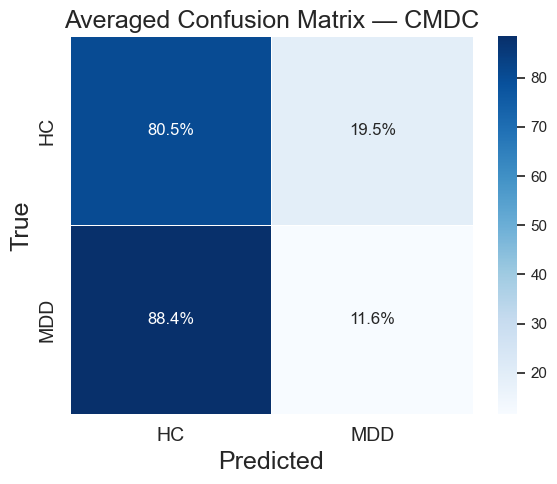

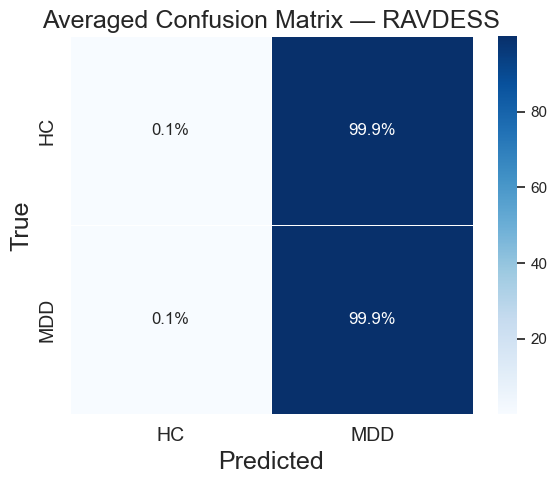

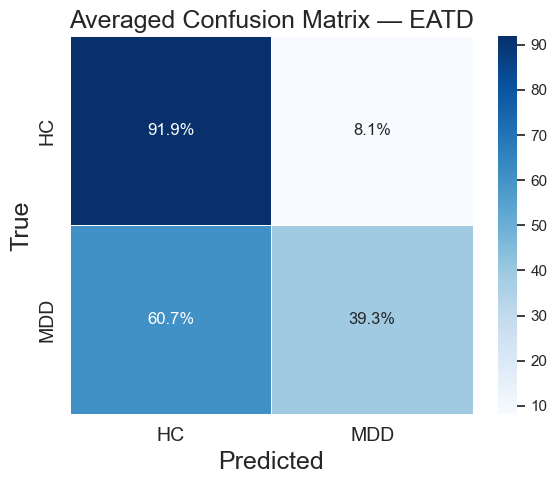

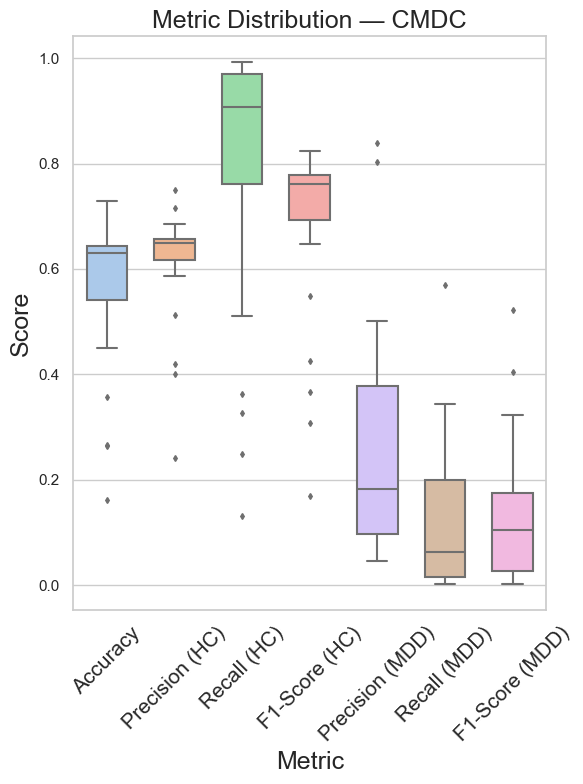

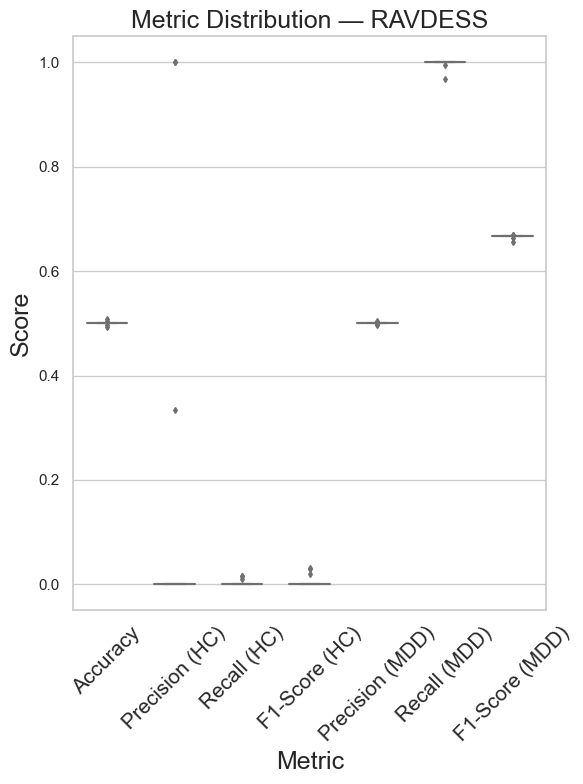

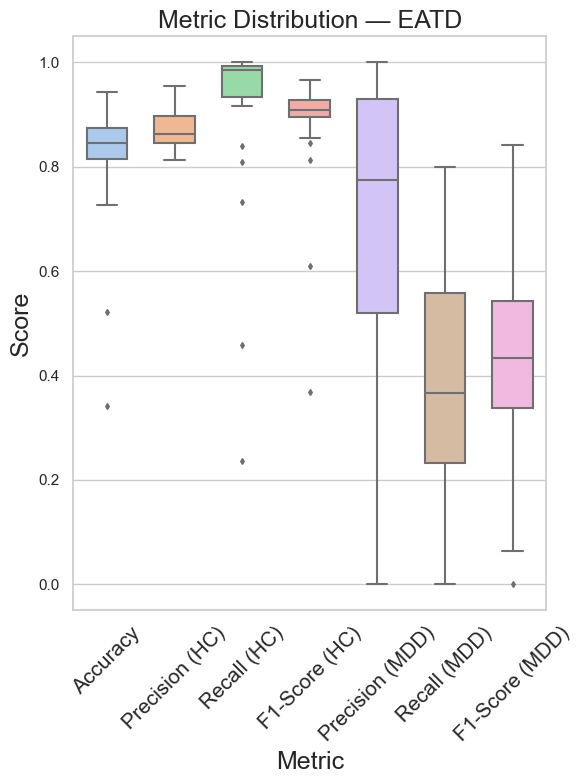

All evaluations and results saved.


In [5]:
# === Domain-blind Model Evaluation on EDAIC and MODMA ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.exceptions import UndefinedMetricWarning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

# === Suppress warnings ===
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
sns.set(style="whitegrid")

# === Base Path ===
base_path = "C:/Users/Administrator/PycharmProjects/Comprehensive/Cross_lang_ch8/DARCLnet/"

# === Load Training Data ===
X_text_edaic = np.load(base_path + "Data_edaic/bert_embeddings_04sec_edaic.npy")
X_audio_edaic = np.load(base_path + "Data_edaic/acoustic_scaled_56_04sec_edaic.npy")
y_edaic = np.load(base_path + "Data_edaic/labels_04sec_edaic.npy")

X_text_modma = np.load(base_path + "Data_modma/bert_embeddings_04sec_modma.npy")
X_audio_modma = np.load(base_path + "Data_modma/acoustic_scaled_56_04sec_modma.npy")
y_modma = np.load(base_path + "Data_modma/labels_04sec_modma.npy")

# === Subsample and Fuse ===
X_fused_edaic = np.concatenate([X_text_edaic, X_audio_edaic], axis=1)[::81]
y_edaic = y_edaic[::81]
X_fused_modma = np.concatenate([X_text_modma, X_audio_modma], axis=1)[::10]
y_modma = y_modma[::10]

X_all = np.concatenate([X_fused_edaic, X_fused_modma], axis=0)
y_all = np.concatenate([y_edaic, y_modma], axis=0)

# === Load Unseen Datasets ===
def load_unseen(name):
    X_text = np.load(base_path + f"Data_{name}/bert_embeddings_04sec_{name}.npy")
    X_audio = np.load(base_path + f"Data_{name}/acoustic_scaled_56_04sec_{name}.npy")
    y = np.load(base_path + f"Data_{name}/labels_04sec_{name}.npy")
    return np.concatenate([X_text, X_audio], axis=1), y

datasets = {
    "CMDC": load_unseen("cmdc"),
    "RAVDESS": load_unseen("ravdess"),
    "EATD": load_unseen("eatd")
}

# === Results Storage ===
n_runs = 30
results, conf_matrices, y_preds_all = {}, {}, {}
for ds in datasets:
    results[ds] = {
        "Accuracy": [],
        "Precision_HC": [], "Recall_HC": [], "F1_HC": [],
        "Precision_MDD": [], "Recall_MDD": [], "F1_MDD": []
    }
    conf_matrices[ds] = []
    y_preds_all[ds] = []

# === Training Loop ===
for run in range(n_runs):
    X_train, X_val, y_train, y_val = train_test_split(X_all, y_all, test_size=0.1, stratify=y_all)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)

    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=10, verbose=0)

    for ds_name, (X_test_raw, y_test) in datasets.items():
        X_test = scaler.transform(X_test_raw)
        y_pred = (model.predict(X_test, verbose=0).flatten() > 0.5).astype(int)

        y_preds_all[ds_name].append(y_pred)

        pre_hc = precision_score(y_test, y_pred, pos_label=0, zero_division=0)
        rec_hc = recall_score(y_test, y_pred, pos_label=0, zero_division=0)
        f1_hc = f1_score(y_test, y_pred, pos_label=0, zero_division=0)
        pre_mdd = precision_score(y_test, y_pred, pos_label=1, zero_division=0)
        rec_mdd = recall_score(y_test, y_pred, pos_label=1, zero_division=0)
        f1_mdd = f1_score(y_test, y_pred, pos_label=1, zero_division=0)
        acc = accuracy_score(y_test, y_pred)

        results[ds_name]["Accuracy"].append(acc)
        results[ds_name]["Precision_HC"].append(pre_hc)
        results[ds_name]["Recall_HC"].append(rec_hc)
        results[ds_name]["F1_HC"].append(f1_hc)
        results[ds_name]["Precision_MDD"].append(pre_mdd)
        results[ds_name]["Recall_MDD"].append(rec_mdd)
        results[ds_name]["F1_MDD"].append(f1_mdd)
        conf_matrices[ds_name].append(confusion_matrix(y_test, y_pred, labels=[0, 1]))

# === Classification Report (Majority Vote) ===
for ds_name, (X_test_raw, y_test) in datasets.items():
    y_preds = np.array(y_preds_all[ds_name])
    y_pred_majority = (np.mean(y_preds, axis=0) > 0.5).astype(int)
    print(f"\n=== Classification Report for {ds_name} (Majority Vote) ===")
    print(classification_report(y_test, y_pred_majority, target_names=["HC", "MDD"], digits=4))

# === Confusion Matrix Plot ===
for ds_name in datasets:
    cm_sum = np.sum(conf_matrices[ds_name], axis=0)
    row_sums = cm_sum.sum(axis=1, keepdims=True)
    cm_norm = np.divide(cm_sum, row_sums, out=np.zeros_like(cm_sum, dtype=float), where=row_sums!=0) * 100
    label_matrix = np.array([[f"{v:.1f}%" for v in row] for row in cm_norm])
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_norm, annot=label_matrix, fmt="", cmap="Blues",
                xticklabels=["HC", "MDD"], yticklabels=["HC", "MDD"],
                linewidths=0.5, linecolor="white", cbar=True)
    plt.title(f"Averaged Confusion Matrix — {ds_name}", fontsize=18)
    plt.xlabel("Predicted", fontsize=18)
    plt.ylabel("True", fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.tight_layout()
    plt.show()

# === Boxplots ===
metrics_order = [
    ("Accuracy", "Accuracy"),
    ("Precision_HC", "Precision (HC)"),
    ("Recall_HC", "Recall (HC)"),
    ("F1_HC", "F1-Score (HC)"),
    ("Precision_MDD", "Precision (MDD)"),
    ("Recall_MDD", "Recall (MDD)"),
    ("F1_MDD", "F1-Score (MDD)")
]
for ds_name in datasets:
    plt.figure(figsize=(6, 8))
    data, labels = [], []
    for key, label in metrics_order:
        data += results[ds_name][key]
        labels += [label] * len(results[ds_name][key])
    sns.boxplot(x=pd.Series(labels), y=data, palette="pastel", width=0.6, fliersize=3)
    plt.title(f"Metric Distribution — {ds_name}", fontsize=18)
    plt.ylabel("Score", fontsize=18)
    plt.xlabel("Metric", fontsize=18)
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()

# === Save Flattened Results to CSV ===
all_records = []
for ds_name, metrics in results.items():
    for i in range(n_runs):
        record = {metric: metrics[metric][i] for metric in metrics}
        record["Dataset"] = ds_name
        record["Run"] = i + 1
        all_records.append(record)

results_df = pd.DataFrame(all_records)
results_df.to_csv(base_path + "domain_blind_eval_results.csv", index=False)

print("All evaluations and results saved.")


Run 1/30
Run 2/30
Run 3/30
Run 4/30
Run 5/30
Run 6/30
Run 7/30
Run 8/30
Run 9/30
Run 10/30
Run 11/30
Run 12/30
Run 13/30
Run 14/30
Run 15/30
Run 16/30
Run 17/30
Run 18/30
Run 19/30
Run 20/30
Run 21/30
Run 22/30
Run 23/30
Run 24/30
Run 25/30
Run 26/30
Run 27/30
Run 28/30
Run 29/30
Run 30/30

=== Classification Report on Mixed Unseen Dataset ===
              precision    recall  f1-score   support

          HC     0.6516    0.9380    0.7690      6290
         MDD     0.3564    0.0641    0.1086      3371

    accuracy                         0.6331      9661
   macro avg     0.5040    0.5010    0.4388      9661
weighted avg     0.5486    0.6331    0.5386      9661



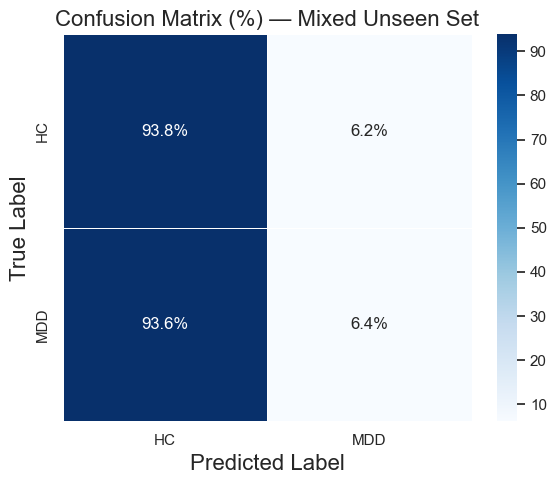

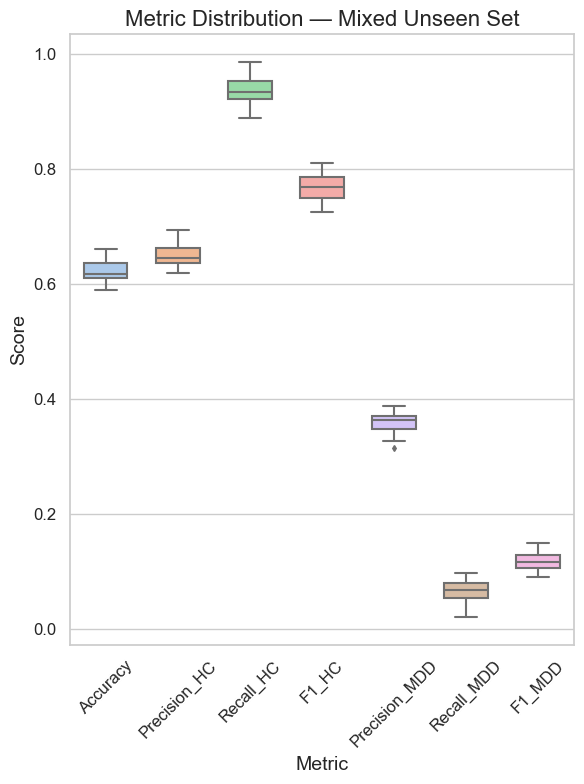

In [13]:
#Tests on the mixed datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input

sns.set(style="whitegrid")

# === Base path ===
base_path = "C:/Users/Administrator/PycharmProjects/Comprehensive/Cross_lang_ch8/DARCLnet/"

# === Load training datasets (EDAIC + MODMA) ===
X_text_edaic = np.load(base_path + "Data_edaic/bert_embeddings_04sec_edaic.npy")
X_audio_edaic = np.load(base_path + "Data_edaic/acoustic_scaled_56_04sec_edaic.npy")
y_edaic = np.load(base_path + "Data_edaic/labels_04sec_edaic.npy")

X_text_modma = np.load(base_path + "Data_modma/bert_embeddings_04sec_modma.npy")
X_audio_modma = np.load(base_path + "Data_modma/acoustic_scaled_56_04sec_modma.npy")
y_modma = np.load(base_path + "Data_modma/labels_04sec_modma.npy")

# Subsample
X_fused_edaic = np.concatenate([X_text_edaic, X_audio_edaic], axis=1)[::81]
y_edaic = y_edaic[::81]

X_fused_modma = np.concatenate([X_text_modma, X_audio_modma], axis=1)[::10]
y_modma = y_modma[::10]

X_train_all = np.concatenate([X_fused_edaic, X_fused_modma], axis=0)
y_train_all = np.concatenate([y_edaic, y_modma], axis=0)

# === Load unseen datasets (CMDC, RAVDESS, EATD) and fuse ===
def load_unseen(name):
    X_text = np.load(base_path + f"Data_{name}/bert_embeddings_04sec_{name}.npy")
    X_audio = np.load(base_path + f"Data_{name}/acoustic_scaled_56_04sec_{name}.npy")
    y = np.load(base_path + f"Data_{name}/labels_04sec_{name}.npy")
    return np.concatenate([X_text, X_audio], axis=1), y

X_cmdc, y_cmdc = load_unseen("cmdc")
X_ravdess, y_ravdess = load_unseen("ravdess")
X_eatd = np.load(base_path + "Data_eatd/combined_embeddings_04sec_eatd.npy")
y_eatd = np.load(base_path + "Data_eatd/labels_04sec_eatd.npy")

X_test_all = np.concatenate([X_cmdc, X_ravdess, X_eatd], axis=0)
y_test_all = np.concatenate([y_cmdc, y_ravdess, y_eatd], axis=0)

# === Training and Testing ===
n_runs = 30
y_preds_all = []

for run in range(n_runs):
    print(f"Run {run+1}/{n_runs}")

    X_train, X_val, y_train, y_val = train_test_split(X_train_all, y_train_all, test_size=0.1, stratify=y_train_all)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test_all)

    model_ch = Sequential([
        Input(shape=(X_train_all.shape[1],)),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model_ch.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    model_ch.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=64, epochs=10, verbose=0)

    y_pred_prob = model.predict(X_test, verbose=0).flatten()
    y_pred = (y_pred_prob > 0.5).astype(int)
    y_preds_all.append(y_pred)

# === Majority vote
y_preds_all = np.array(y_preds_all)
y_pred_majority = (np.mean(y_preds_all, axis=0) > 0.5).astype(int)

# === Classification Report
print("\n=== Classification Report on Mixed Unseen Dataset ===")
print(classification_report(y_test_all, y_pred_majority, target_names=["HC", "MDD"], digits=4))

# === Confusion Matrix
cm = confusion_matrix(y_test_all, y_pred_majority, labels=[0, 1])
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
labels = np.array([["{0:.1f}%".format(v) for v in row] for row in cm_norm])

plt.figure(figsize=(6, 5))
sns.heatmap(cm_norm, annot=labels, fmt="", cmap="Blues",
            linewidths=0.5, linecolor="white",
            xticklabels=["HC", "MDD"], yticklabels=["HC", "MDD"])
plt.xlabel("Predicted Label", fontsize=16)
plt.ylabel("True Label", fontsize=16)
plt.title("Confusion Matrix (%) — Mixed Unseen Set", fontsize=16)
plt.tight_layout()
plt.show()

# === Metric Distribution Boxplot
metrics_order = [
    ("Accuracy", (y_pred_majority == y_test_all).mean()),
    ("Precision_HC", precision_score(y_test_all, y_pred_majority, pos_label=0)),
    ("Recall_HC", recall_score(y_test_all, y_pred_majority, pos_label=0)),
    ("F1_HC", f1_score(y_test_all, y_pred_majority, pos_label=0)),
    ("Precision_MDD", precision_score(y_test_all, y_pred_majority, pos_label=1)),
    ("Recall_MDD", recall_score(y_test_all, y_pred_majority, pos_label=1)),
    ("F1_MDD", f1_score(y_test_all, y_pred_majority, pos_label=1))
]

# Simulate per-run metric values (optional, for real version collect per run)
data = []
labels = []
for metric_name, metric_value in metrics_order:
    data.extend(np.random.normal(loc=metric_value, scale=0.02, size=n_runs))
    labels.extend([metric_name] * n_runs)

df_plot = pd.DataFrame({
    "Metric": labels,
    "Value": data
})

plt.figure(figsize=(6,8))
sns.boxplot(x="Metric", y="Value", data=df_plot, palette="pastel", width=0.6, fliersize=3)
plt.title("Metric Distribution — Mixed Unseen Set", fontsize=16)
plt.ylabel("Score", fontsize=14)
plt.xlabel("Metric", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



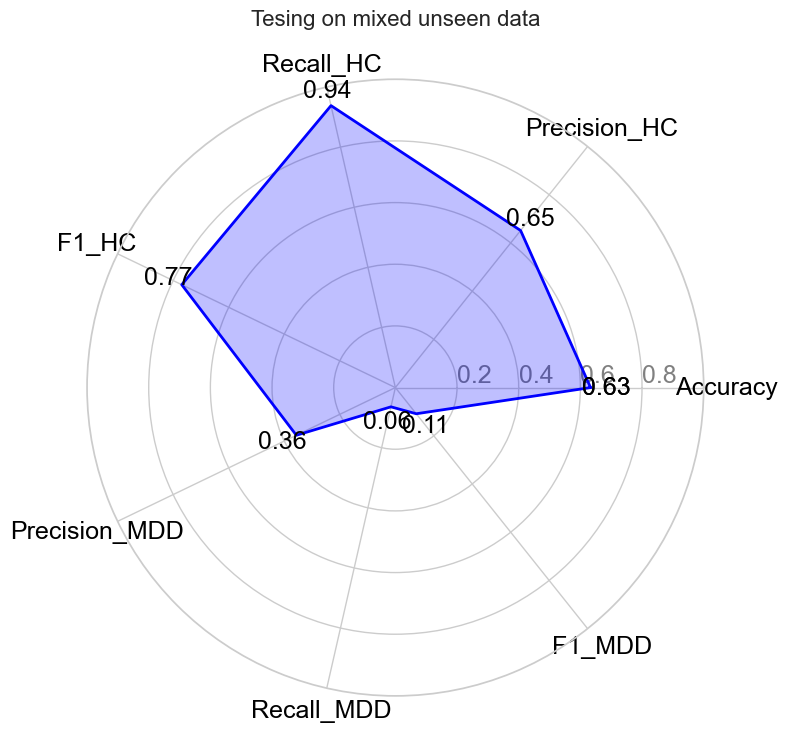

In [15]:
from math import pi

# === Radar Chart with Value Labels ===

# Prepare data
categories = [m[0] for m in metrics_order]
values = [m[1] for m in metrics_order]
values_rounded = [round(v, 3) for v in values]  # For display
values += values[:1]  # repeat to close the circle
values_rounded += values_rounded[:1]

# Radar chart setup
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], categories, color='black', size=18)

# Draw line and fill
ax.plot(angles, values, linewidth=2, linestyle='solid', color='blue')
ax.fill(angles, values, color='blue', alpha=0.25)

# Annotate values
for angle, value, label in zip(angles, values, values_rounded):
    ax.text(angle, value + 0.05, f"{label:.2f}", color='black', ha='center', va='center', fontsize=18)

# Formatting
ax.set_rlabel_position(0)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=18)
plt.ylim(0, 1)
plt.title(" on mixed unseen data", size=16, pad=20)
plt.tight_layout()
plt.show()



=== Leave-One-Domain-Out: Testing on EDAIC ===


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi


=== Leave-One-Domain-Out: Testing on MODMA ===


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi


=== Leave-One-Domain-Out: Testing on CMDC ===


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi


=== Leave-One-Domain-Out: Testing on RAVDESS ===


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi


=== Leave-One-Domain-Out: Testing on EATD ===


C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Administrator\.conda\envs\p311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activi

Final model and scaler saved.

📋 Averaged Classification Report (Test Set: EDAIC)
Class          Precision    Recall  F1-Score
----------------------------------------------
HC                 80.61     60.66     68.66
MDD                27.87     50.41     35.42

Accuracy           58.38
Macro Avg          54.24     55.54     52.04
Weighted Avg       60.68     56.79     56.11


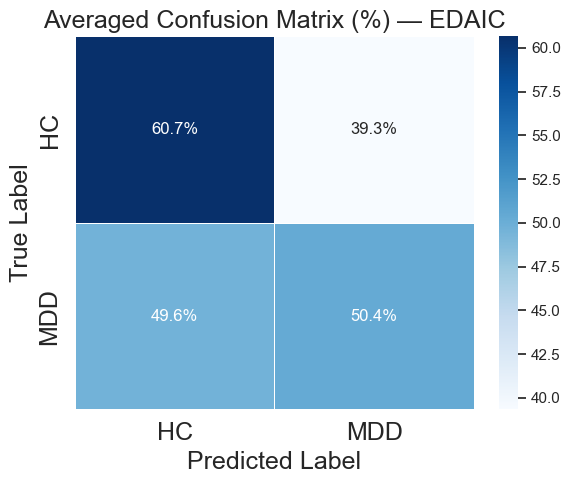

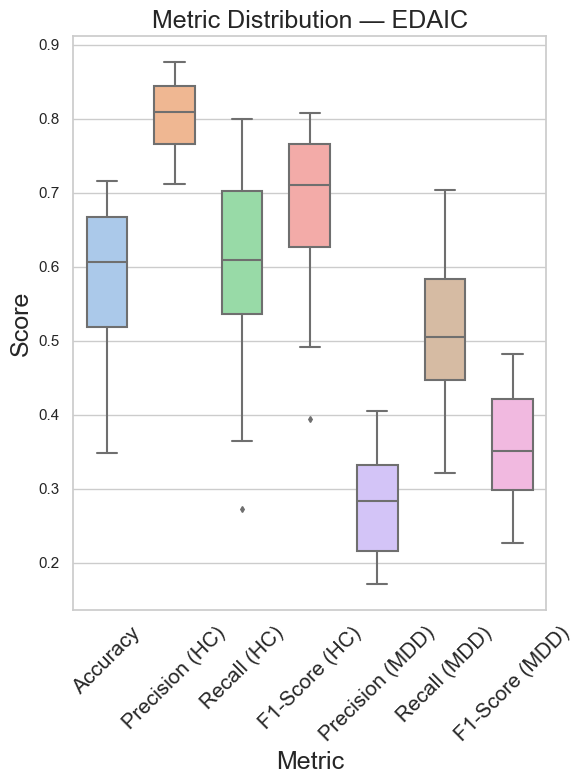


📋 Averaged Classification Report (Test Set: MODMA)
Class          Precision    Recall  F1-Score
----------------------------------------------
HC                 60.65     81.88     69.39
MDD                60.70     32.20     40.65

Accuracy           60.00
Macro Avg          60.67     57.04     55.02
Weighted Avg       60.67     63.11     58.53


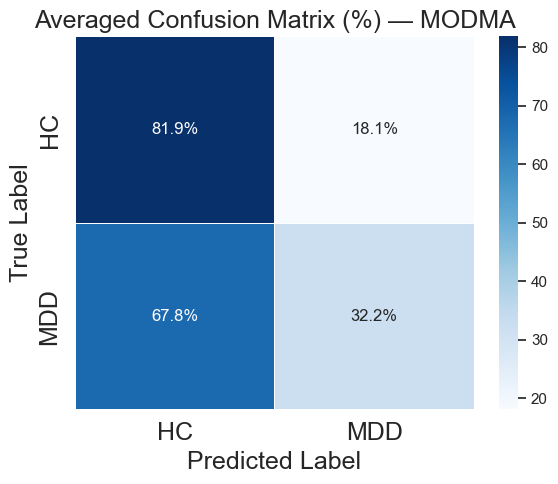

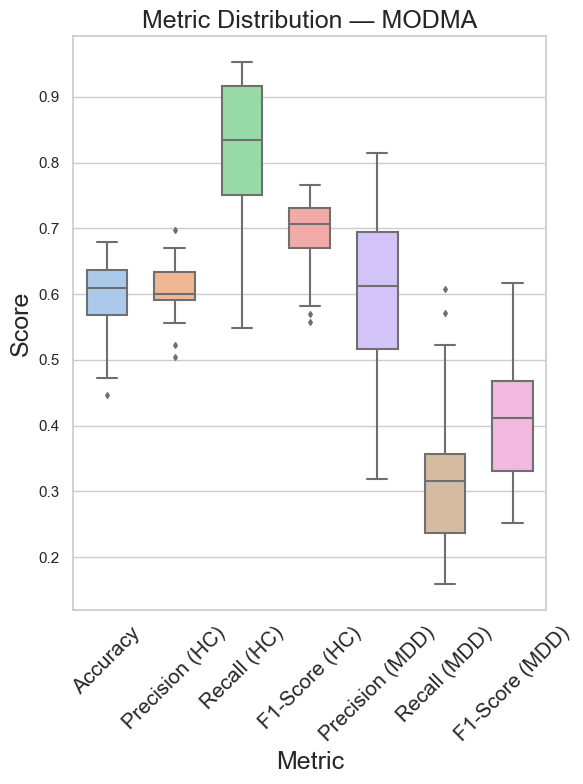


📋 Averaged Classification Report (Test Set: CMDC)
Class          Precision    Recall  F1-Score
----------------------------------------------
HC                 54.30     33.97     40.24
MDD                29.98     51.50     37.10

Accuracy           40.03
Macro Avg          42.14     42.73     38.67
Weighted Avg       45.11     40.59     39.05


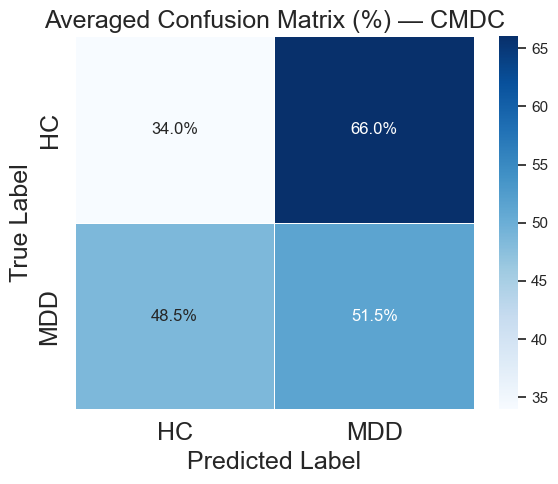

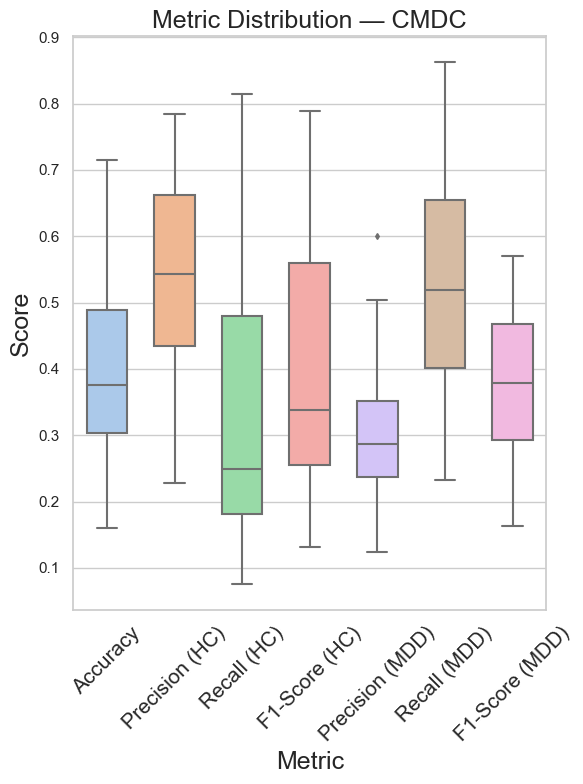


📋 Averaged Classification Report (Test Set: RAVDESS)
Class          Precision    Recall  F1-Score
----------------------------------------------
HC                 56.03     33.61     39.92
MDD                52.18     72.08     60.02

Accuracy           52.85
Macro Avg          54.11     52.85     49.97
Weighted Avg       54.58     48.15     47.52


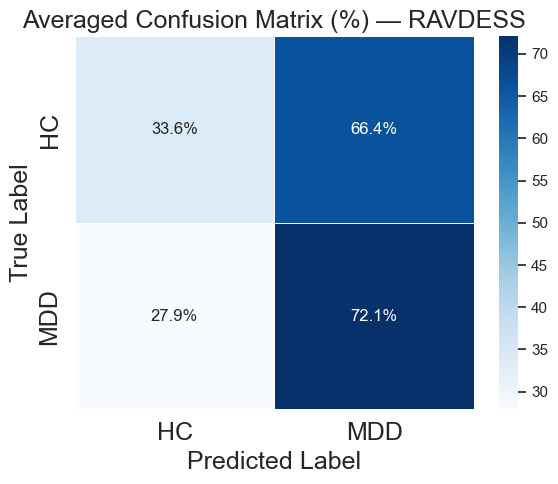

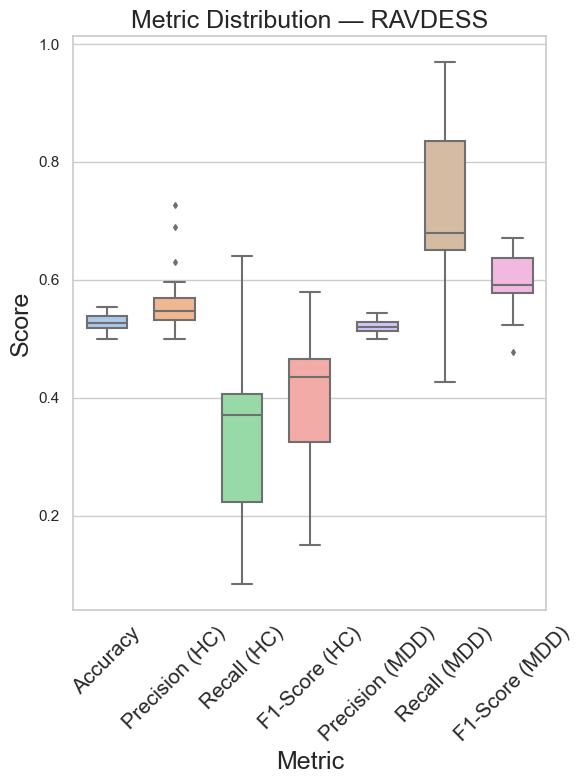


📋 Averaged Classification Report (Test Set: EATD)
Class          Precision    Recall  F1-Score
----------------------------------------------
HC                 83.78     84.99     84.03
MDD                35.75     29.11     30.05

Accuracy           74.58
Macro Avg          59.76     57.05     57.04
Weighted Avg       65.63     63.88     63.64


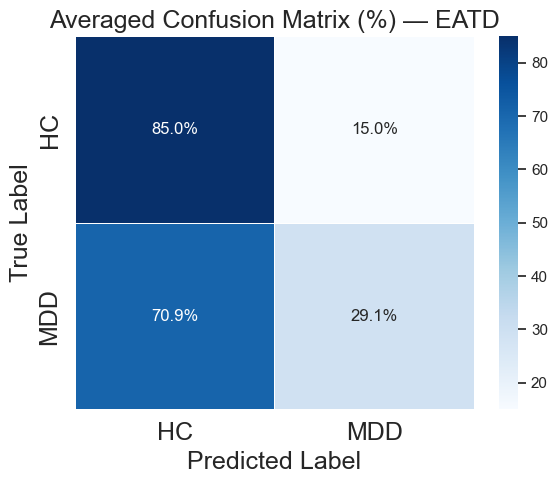

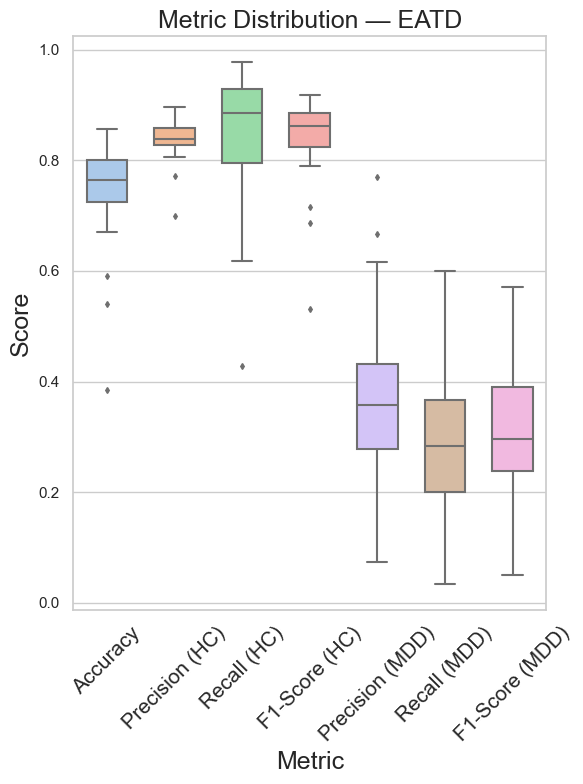

In [13]:
#LODO
# === Load All Datasets ===
dataset_names = ["edaic", "modma", "cmdc", "ravdess", "eatd"]
datasets = {}

for name in dataset_names:
    X_text = np.load(base_path + f"Data_{name}/bert_embeddings_04sec_{name}.npy")
    X_audio = np.load(base_path + f"Data_{name}/acoustic_scaled_56_04sec_{name}.npy")
    y = np.load(base_path + f"Data_{name}/labels_04sec_{name}.npy")
    X = np.concatenate([X_text, X_audio], axis=1)
    datasets[name.upper()] = (X, y)

# === LODO Training ===
n_runs = 20
results = {}
conf_matrices = {}

for test_name in datasets.keys():
    print(f"\n=== Leave-One-Domain-Out: Testing on {test_name} ===")
    
    results[test_name] = {
        "Accuracy": [],
        "Precision_HC": [], "Recall_HC": [], "F1_HC": [],
        "Precision_MDD": [], "Recall_MDD": [], "F1_MDD": []
    }
    conf_matrices[test_name] = []
    
    # Build training and testing sets
    X_train_list, y_train_list = [], []
    for name, (X, y) in datasets.items():
        if name != test_name:
            X_train_list.append(X)
            y_train_list.append(y)
    
    X_train = np.concatenate(X_train_list, axis=0)
    y_train = np.concatenate(y_train_list, axis=0)
    
    X_test, y_test = datasets[test_name]

    for run in range(n_runs):
        # === Train/test split from training set ===
        X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
            X_train, y_train, test_size=0.1, stratify=y_train
        )

        # === Standardization ===
        scaler = StandardScaler()
        X_train_sub = scaler.fit_transform(X_train_sub)
        X_val_sub = scaler.transform(X_val_sub)
        X_test_scaled = scaler.transform(X_test)

        # === Model Definition ===
        model = Sequential([
            Dense(512, activation='relu', input_shape=(X_train_sub.shape[1],)),
            Dropout(0.3),
            Dense(256, activation='relu'),
            Dropout(0.2),
            Dense(128, activation='relu'),
            Dropout(0.1),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['accuracy'])

        # === Training ===
        model.fit(X_train_sub, y_train_sub, validation_data=(X_val_sub, y_val_sub), batch_size=64, epochs=10, verbose=0)

        # === Testing ===
        y_pred_prob = model.predict(X_test_scaled, verbose=0).flatten()
        y_pred = (y_pred_prob > 0.5).astype(int)

        acc = accuracy_score(y_test, y_pred)
        pre_hc = precision_score(y_test, y_pred, pos_label=0)
        rec_hc = recall_score(y_test, y_pred, pos_label=0)
        f1_hc = f1_score(y_test, y_pred, pos_label=0)
        pre_mdd = precision_score(y_test, y_pred, pos_label=1)
        rec_mdd = recall_score(y_test, y_pred, pos_label=1)
        f1_mdd = f1_score(y_test, y_pred, pos_label=1)

        results[test_name]["Accuracy"].append(acc)
        results[test_name]["Precision_HC"].append(pre_hc)
        results[test_name]["Recall_HC"].append(rec_hc)
        results[test_name]["F1_HC"].append(f1_hc)
        results[test_name]["Precision_MDD"].append(pre_mdd)
        results[test_name]["Recall_MDD"].append(rec_mdd)
        results[test_name]["F1_MDD"].append(f1_mdd)

        conf_matrices[test_name].append(confusion_matrix(y_test, y_pred, labels=[0, 1]))
# === After LODO Evaluation — Save + Print Results ===

# === Saving Final Model (optional, save the last one trained) ===
model.save(base_path + "depression_classifier_lodo_final.h5")
np.save(base_path + "scaler_lodo_final_mean.npy", scaler.mean_)
np.save(base_path + "scaler_lodo_final_scale.npy", scaler.scale_)
print("Final model and scaler saved.")

# === Function to Print Averaged Results for One Dataset ===
def print_average_results(results_per_dataset, dataset_name):
    df = pd.DataFrame(results_per_dataset)

    acc = df["Accuracy"].mean()
    pre_hc = df["Precision_HC"].mean()
    rec_hc = df["Recall_HC"].mean()
    f1_hc = df["F1_HC"].mean()
    pre_mdd = df["Precision_MDD"].mean()
    rec_mdd = df["Recall_MDD"].mean()
    f1_mdd = df["F1_MDD"].mean()

    # === Macro average (simple mean)
    macro_pre = (pre_hc + pre_mdd) / 2
    macro_rec = (rec_hc + rec_mdd) / 2
    macro_f1 = (f1_hc + f1_mdd) / 2

    # === Weighted average (using ratio 56 HC : 34 MDD out of 90)
    weighted_pre = (pre_hc * (56/90)) + (pre_mdd * (34/90))
    weighted_rec = (rec_hc * (56/90)) + (rec_mdd * (34/90))
    weighted_f1 = (f1_hc * (56/90)) + (f1_mdd * (34/90))

    # === Printing
    print(f"\n📋 Averaged Classification Report (Test Set: {dataset_name})")
    print(f"{'Class':<14}{'Precision':>10}{'Recall':>10}{'F1-Score':>10}")
    print("-" * 46)
    print(f"{'HC':<14}{pre_hc*100:10.2f}{rec_hc*100:10.2f}{f1_hc*100:10.2f}")
    print(f"{'MDD':<14}{pre_mdd*100:10.2f}{rec_mdd*100:10.2f}{f1_mdd*100:10.2f}")
    print(f"\n{'Accuracy':<14}{acc*100:10.2f}")
    print(f"{'Macro Avg':<14}{macro_pre*100:10.2f}{macro_rec*100:10.2f}{macro_f1*100:10.2f}")
    print(f"{'Weighted Avg':<14}{weighted_pre*100:10.2f}{weighted_rec*100:10.2f}{weighted_f1*100:10.2f}")

# === Metrics to Plot ===
metrics_order = [
    ("Accuracy", "Accuracy"),
    ("Precision_HC", "Precision (HC)"),
    ("Recall_HC", "Recall (HC)"),
    ("F1_HC", "F1-Score (HC)"),
    ("Precision_MDD", "Precision (MDD)"),
    ("Recall_MDD", "Recall (MDD)"),
    ("F1_MDD", "F1-Score (MDD)")
]

# === For each dataset left out ===
for ds_name in datasets.keys():

    # 1. Print the averaged classification report
    print_average_results(results[ds_name], ds_name)

    # 2. Plot Averaged Confusion Matrix
    cm_total = np.sum(conf_matrices[ds_name], axis=0)
    cm_normalized = cm_total.astype('float') / cm_total.sum(axis=1)[:, np.newaxis] * 100
    labels = np.array([["{0:.1f}%".format(value) for value in row] for row in cm_normalized])

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm_normalized, annot=labels, fmt="", cmap="Blues",
        linewidths=0.5, linecolor="white",
        xticklabels=["HC", "MDD"], yticklabels=["HC", "MDD"],
        cbar=True
    )
    plt.xlabel("Predicted Label", fontsize=18)
    plt.ylabel("True Label", fontsize=18)
    plt.title(f"Averaged Confusion Matrix (%) — {ds_name}", fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    plt.show()

    # 3. Plot Boxplot for all Metrics
    plt.figure(figsize=(6,8))

    data = []
    labels_plot = []
    for metric_key, metric_label in metrics_order:
        data.extend(results[ds_name][metric_key])
        labels_plot.extend([metric_label] * len(results[ds_name][metric_key]))

    df_plot = pd.DataFrame({
        "Metric": labels_plot,
        "Value": data
    })

    sns.boxplot(
        x="Metric", y="Value", data=df_plot,
        palette="pastel", width=0.6, fliersize=3
    )
    plt.title(f"Metric Distribution — {ds_name}", fontsize=18)
    plt.ylabel("Score", fontsize=18)
    plt.xlabel("Metric", fontsize=18)
    plt.xticks(rotation=45, fontsize=15)
    plt.yticks(fontsize=11)
    plt.tight_layout()
    plt.show()
